**Problem statement**: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [2]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from glob import glob
from tensorflow.keras.layers.experimental.preprocessing import Rescaling
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [80]:
# Defining the path for train and test images
data_dir_train = pathlib.Path("gdrive/My Drive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
data_dir_test = pathlib.Path("gdrive/My Drive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Test/")

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [7]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, labels='inferred', label_mode='categorical',class_names=None, color_mode='rgb', 
                                                               batch_size=32, image_size=(180,180), shuffle=True, seed=123, validation_split=0.2,
                                                               subset='training',interpolation='bilinear', follow_links=False, smart_resize=False)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [8]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, labels='inferred', label_mode='categorical',class_names=None,
                                                             color_mode='rgb', batch_size=32, image_size=(180,180), shuffle=True, seed=123, 
                                                             validation_split=0.2, subset='validation',interpolation='bilinear',
                                                             follow_links=False, smart_resize=False)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

In [79]:
data_dir_train

'gdrive/My Drive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/'

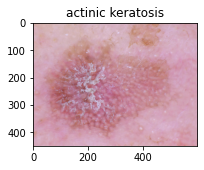

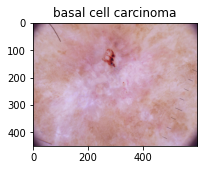

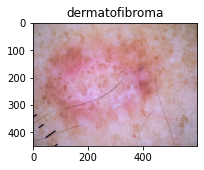

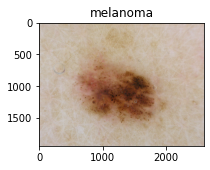

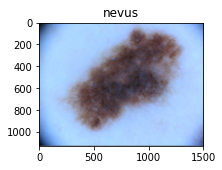

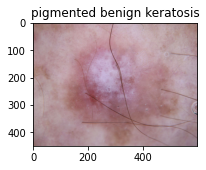

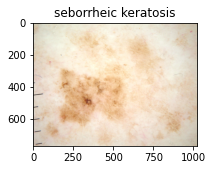

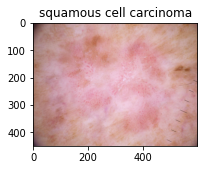

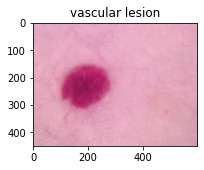

In [11]:
import matplotlib.pyplot as plt
for i in range(0,9):
  plt.figure(figsize=(10,10)) 
  plt.subplot(3, 3, i + 1)
  image = plt.imread(str(list(data_dir_train.glob(class_names[i]+'/*.jpg'))[1]))
  plt.title(class_names[i])
  plt.imshow(image)
        

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [13]:
model = Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))])

model.add(Conv2D(32, (3,3),padding = 'Same', input_shape = (img_height, img_width, 32)))
model.add(Activation('relu'))
model.add(Conv2D( 32,(3,3),padding = 'Same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(32,(3,3),padding = 'Same', activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(64,(3,3),padding = 'Same', activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(9, activation = "softmax"))

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [14]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [15]:
# View the summary of all layers
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 32)      896       
                                                                 
 activation (Activation)     (None, 180, 180, 32)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 180, 180, 32)      9248      
                                                                 
 activation_1 (Activation)   (None, 180, 180, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 32)       0         
 )                                                               
                                                        

In [16]:
epochs = 20
history = model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/20
169/169 [==============================] - 1912s 4s/step - loss: 1.8615 - accuracy: 0.2819 - val_loss: 1.5803 - val_accuracy: 0.3883
Epoch 2/20
169/169 [==============================] - 400s 2s/step - loss: 1.4910 - accuracy: 0.4458 - val_loss: 1.3640 - val_accuracy: 0.4885
Epoch 3/20
169/169 [==============================] - 392s 2s/step - loss: 1.2971 - accuracy: 0.5267 - val_loss: 1.3067 - val_accuracy: 0.5442
Epoch 4/20
169/169 [==============================] - 392s 2s/step - loss: 1.1103 - accuracy: 0.6052 - val_loss: 1.1370 - val_accuracy: 0.5917
Epoch 5/20
169/169 [==============================] - 393s 2s/step - loss: 0.9249 - accuracy: 0.6693 - val_loss: 1.0560 - val_accuracy: 0.6288
Epoch 6/20
169/169 [==============================] - 392s 2s/step - loss: 0.7855 - accuracy: 0.7281 - val_loss: 1.0103 - val_accuracy: 0.6600
Epoch 7/20
169/169 [==============================] - 392s 2s/step - loss: 0.6911 - accuracy: 0.7611 - val_loss: 0.9310 - val_accuracy: 0.709

### Visualizing training results

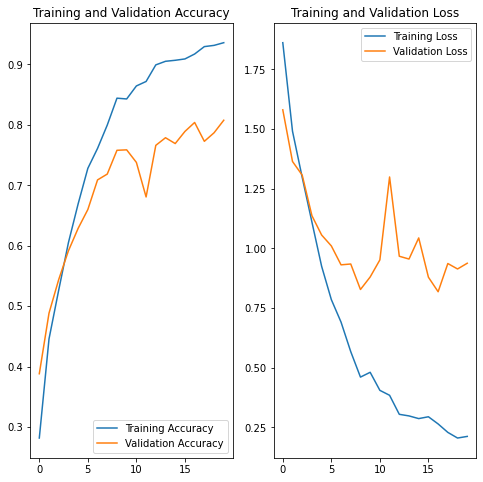

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


1. The training accuracy is around 0.93  and validation accuracy is around 0.80
2. The training accuracy > validatin accuracy => There is overfitting in the model

## Lets do data augmentation now and train the model again

In [19]:
data_augmentation=tf.keras.Sequential([layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),layers.experimental.preprocessing.RandomRotation(0.2)])

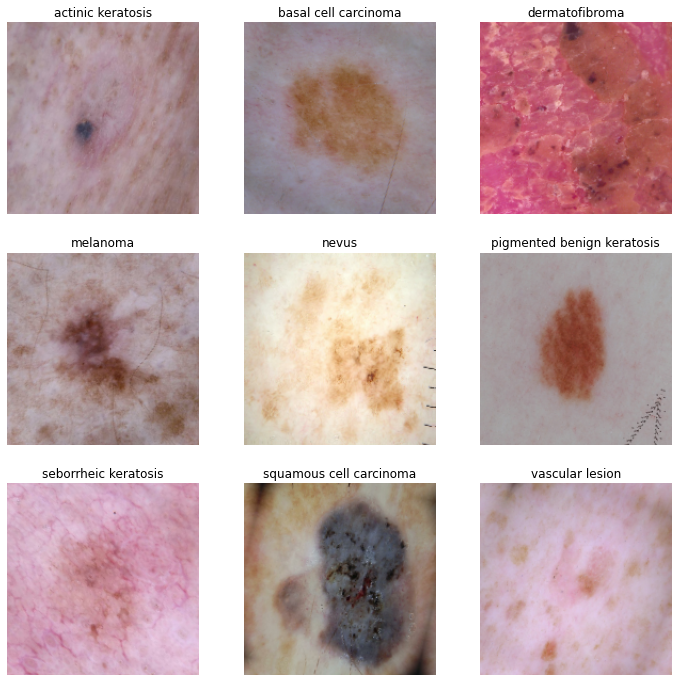

In [20]:
plt.figure(figsize=(12, 12))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(data_augmentation(images)[i].numpy().astype("uint8"))
        plt.title(class_names[i])
        plt.axis("off")

### Todo:
### Create the model, compile and train the AUGMENTED model


In [22]:
model_aug = Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))])

model_aug.add(Conv2D(32, (3,3),padding = 'Same', input_shape = (img_height, img_width, 32)))
model_aug.add(Activation('relu'))
model_aug.add(Conv2D( 32,(3,3),padding = 'Same'))
model_aug.add(Activation('relu'))
model_aug.add(MaxPooling2D(pool_size=(2,2)))

model_aug.add(Conv2D(32,(3,3),padding = 'Same', activation ='relu'))
model_aug.add(MaxPooling2D(pool_size=(2,2)))
model_aug.add(Conv2D(64,(3,3),padding = 'Same', activation ='relu'))
model_aug.add(MaxPooling2D(pool_size=(2,2)))
model_aug.add(Dropout(0.25))

model_aug.add(Flatten())
model_aug.add(Dense(9, activation = "softmax"))

In [23]:
model_aug.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [24]:
epochs = 20
history = model_aug.fit(train_ds, validation_data=val_ds, epochs=epochs )

Epoch 1/20
169/169 [==============================] - 399s 2s/step - loss: 1.9870 - accuracy: 0.2398 - val_loss: 1.6425 - val_accuracy: 0.3905
Epoch 2/20
169/169 [==============================] - 396s 2s/step - loss: 1.5569 - accuracy: 0.4201 - val_loss: 1.4729 - val_accuracy: 0.4840
Epoch 3/20
169/169 [==============================] - 393s 2s/step - loss: 1.3433 - accuracy: 0.5171 - val_loss: 1.3060 - val_accuracy: 0.5145
Epoch 4/20
169/169 [==============================] - 393s 2s/step - loss: 1.1156 - accuracy: 0.5959 - val_loss: 1.1560 - val_accuracy: 0.6110
Epoch 5/20
169/169 [==============================] - 392s 2s/step - loss: 0.9694 - accuracy: 0.6573 - val_loss: 1.1269 - val_accuracy: 0.6377
Epoch 6/20
169/169 [==============================] - 392s 2s/step - loss: 0.8093 - accuracy: 0.7096 - val_loss: 1.0423 - val_accuracy: 0.6644
Epoch 7/20
169/169 [==============================] - 394s 2s/step - loss: 0.6886 - accuracy: 0.7615 - val_loss: 1.0321 - val_accuracy: 0.6763

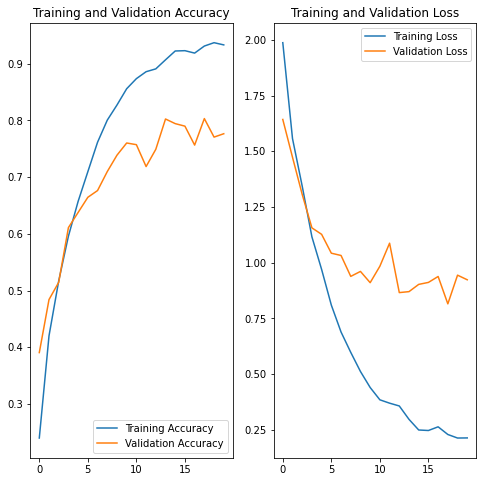

In [25]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

The model as you can see in the figure is still overfitting. Training accuracy has increased slightly.

#### - Which class has the least number of samples?
#### - Which classes dominate the data in terms proportionate number of samples?


In [81]:
for i in class_names:
    directory = 'gdrive/My Drive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/'+i+'/'
    class_directory = pathlib.Path(directory)
    length=len(list(class_directory.glob('*.jpg')))
    print(f"CLASS: {i} ---- {length} samples.")

CLASS: actinic keratosis ---- 114 samples.
CLASS: basal cell carcinoma ---- 376 samples.
CLASS: dermatofibroma ---- 95 samples.
CLASS: melanoma ---- 438 samples.
CLASS: nevus ---- 357 samples.
CLASS: pigmented benign keratosis ---- 462 samples.
CLASS: seborrheic keratosis ---- 77 samples.
CLASS: squamous cell carcinoma ---- 181 samples.
CLASS: vascular lesion ---- 139 samples.


Number of samples in different classes are different.Its not balanced.

The class Seborrheic Keratosis is least with 77.

Class with highest number of samples is pigmented benign keratosis with  462 samples.

In [33]:
!pip install Augmentor

In [70]:
train_path = "gdrive/My Drive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(train_path+i,save_format='jpg')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F31DB14BB10>: 100%|██████████| 500/500 [00:17<00:00, 28.76 Samples/s]


Initialised with 376 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F31DA620890>: 100%|██████████| 500/500 [00:17<00:00, 29.21 Samples/s]


Initialised with 95 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F31D45E2610>: 100%|██████████| 500/500 [00:17<00:00, 28.83 Samples/s]


Initialised with 438 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=3072x2304 at 0x7F31D8A68E10>: 100%|██████████| 500/500 [01:20<00:00,  6.20 Samples/s]


Initialised with 357 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F31D8D90150>: 100%|██████████| 500/500 [01:16<00:00,  6.55 Samples/s]


Initialised with 462 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F31DA620AD0>: 100%|██████████| 500/500 [00:17<00:00, 28.97 Samples/s]


Initialised with 77 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7F31DA0AA350>: 100%|██████████| 500/500 [00:36<00:00, 13.62 Samples/s]


Initialised with 181 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F31DF130150>: 100%|██████████| 500/500 [00:17<00:00, 29.37 Samples/s]


Initialised with 139 image(s) found.
Output directory set to gdrive/My Drive/Colab Notebooks/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F31FF136B90>: 100%|██████████| 500/500 [00:17<00:00, 29.22 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [82]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [83]:
for i in class_names:
    directory =train_path+i+'/'
    directory_aug =train_path+i+'/output/'
    old_directory = pathlib.Path(directory)
    new_directory = pathlib.Path(directory_aug)
    old_len=len(list(old_directory.glob('*.jpg')))
    new_len=len(list(new_directory.glob('*.jpg')))
    length_tot=old_len+new_len
    print(f'Class {i} : {length_tot}.')

Class actinic keratosis : 614.
Class basal cell carcinoma : 876.
Class dermatofibroma : 595.
Class melanoma : 938.
Class nevus : 857.
Class pigmented benign keratosis : 962.
Class seborrheic keratosis : 577.
Class squamous cell carcinoma : 681.
Class vascular lesion : 639.


Above is the distribution of the augmented data set

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [84]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [85]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, seed=123, label_mode='categorical', validation_split = 0.2,
                                                               subset = 'training', image_size=(img_height, img_width),batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a Validation dataset

In [86]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory( data_dir_train, seed=123, label_mode='categorical', validation_split = 0.2,
                                                             subset = 'validation',image_size=(img_height, img_width), batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [87]:
model_last = Sequential([layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width,3))])

model_last.add(Conv2D(32, (3,3),padding = 'Same', input_shape = (img_height, img_width, 32)))
model_last.add(Activation('relu'))
model_last.add(Conv2D( 32,(3,3),padding = 'Same'))
model_last.add(Activation('relu'))
model_last.add(MaxPooling2D(pool_size=(2,2)))
model_last.add(Dropout(0.1))

model_last.add(Conv2D(32,(3,3),padding = 'Same', activation ='relu'))
model_last.add(MaxPooling2D(pool_size=(2,2)))
model_last.add(Conv2D(64,(3,3),padding = 'Same', activation ='relu'))
model_last.add(MaxPooling2D(pool_size=(2,2)))
model_last.add(Dropout(0.25))

model_last.add(Flatten())
model_last.add(Dense(9, activation = "softmax"))

In [88]:
model_last.compile(optimizer='adam',loss='categorical_crossentropy',metrics='accuracy')

In [ ]:
epochs = 50
## Your code goes here, use 50 epochs.
history = model_last.fit( train_ds, validation_data=val_ds,epochs=epochs)

Epoch 1/50
  2/169 [..............................] - ETA: 7:00 - loss: 2.0125 - accuracy: 0.2344 

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

OVerfitting has been improved a bit due to class rebalance. However it still prevails. We can add more dropout layers to handle the same.